### Real Estate XGBoost Demo

In [14]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
pd.set_option('display.max_columns',None)

### EDA

In [15]:
# os.listdir('data')

In [16]:
# Change the file path as neccessary
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [17]:
# train.info()
# test.shape

In [18]:
test_cols = test.columns
train_cols = train.columns
[e for e in train_cols if e not in test_cols]

['SalePrice']

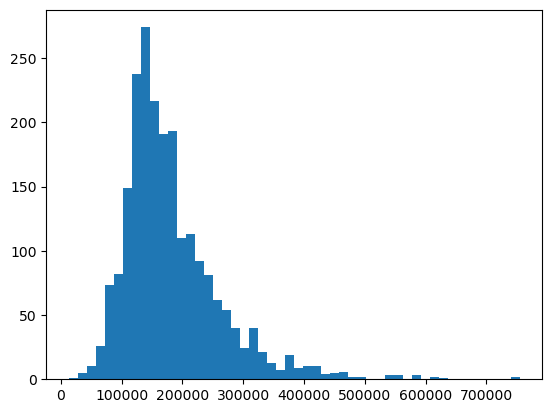

In [19]:
target_var = 'SalePrice'
y = train[target_var]
plt.hist(y, bins=50);

In [20]:
train[train['Garage Cars'].isna()==True]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
761,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


### Filled the one null in Garage Cars with the mode

In [21]:
train['Garage Cars'].fillna(2,inplace=True)

In [22]:
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1218.0,1218.0,GasA,Ex,Y,SBrkr,1218,0,0,1218,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Detchd,2007.0,RFn,2.0,576.0,TA,TA,Y,0,178,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd,TA,Mn,ALQ,485.0,BLQ,177.0,1496.0,2158.0,GasA,Gd,Y,SBrkr,2196,0,0,2196,0.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,3.0,701.0,TA,TA,Y,84,70,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,BrkFace,500.0,Ex,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1451.0,1451.0,GasA,Ex,Y,SBrkr,1456,0,0,1456,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2008.0,RFn,2.0,539.0,TA,TA,Y,192,42,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,SLvl,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,241.0,Rec,113.0,30.0,384.0,GasA,Ex,Y,SBrkr,744,630,0,1374,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2004.0,Fin,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


### The cells below were all used for EDA and then commented out for ease of reading

In [23]:
# train['Garage Cars'].value_counts()

In [24]:
# plt.scatter(train['Garage Cars'],train['SalePrice']);

In [25]:
# plt.scatter(train['TotRms AbvGrd'],train['SalePrice']);

In [26]:
# plt.xlabel("Year Built")
# plt.ylabel("Sale Price")
# plt.title("PD&J Cool EDA Graph")
# plt.scatter(train['Year Built'],train['SalePrice'],alpha=0.5);

In [27]:
# plt.scatter(train['Gr Liv Area'],train['SalePrice']);

In [28]:
# plt.scatter(train['Overall Qual'],train['SalePrice']);

In [29]:
# plt.scatter(train['Overall Cond'],train['SalePrice']);

In [30]:
try: test[target_var]
except: print('No target variable in test set')

No target variable in test set


### Defining our X and y

In [31]:
X = train.drop(target_var, axis=1)
y = train[target_var]

In [32]:
# X['Sale Condition'].value_counts()

In [33]:
cols = ['Overall Qual','Overall Cond','Gr Liv Area','Bldg Type','Garage Cars','Year Built']
X = X[cols]

tmp = pd.get_dummies(X['Bldg Type'], drop_first=True)
X = pd.concat([X, tmp], axis=1)
X = X.drop('Bldg Type', axis=1)
X.head(5)

,Overall Qual,Overall Cond,Gr Liv Area,Garage Cars,Year Built,2fmCon,Duplex,Twnhs,TwnhsE
0,7,6,1218,2.0,2007,0,0,0,0
1,7,7,2196,3.0,1990,0,0,0,0
2,6,6,1344,2.0,1958,0,0,0,0
3,9,5,1456,2.0,2008,0,0,0,1
4,7,5,1374,2.0,2004,0,0,0,0


### Running the train_test_split

In [34]:
Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=0, test_size=0.2)

Xtr.shape, Xval.shape, ytr.shape, yval.shape

((1757, 9), (440, 9), (1757,), (440,))

### Running XGBRegressor

In [35]:
bst = XGBRegressor(objective='reg:linear',random_state=42)
bst.fit(Xtr, ytr)
print("Training set accuracy score:",bst.score(Xtr,ytr))
print("Test set accuracy score:",bst.score(Xval,yval))
y_pred = bst.predict(Xval)

[15:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Training set accuracy score: 0.9844400202058758
Test set accuracy score: 0.8724648377807942


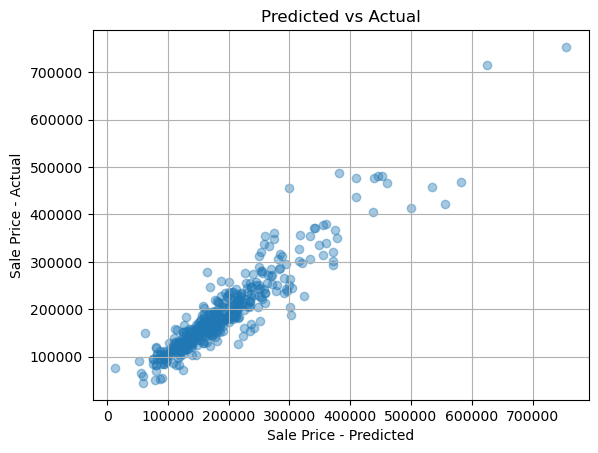

In [36]:
plt.scatter(yval,y_pred, alpha = .4);
plt.grid()
plt.xlabel("Sale Price - Predicted")
plt.ylabel("Sale Price - Actual")
plt.title("Predicted vs Actual");